## Short Answer  
Please answer each of the following questions with **at least 2-3 complete sentences**. 

1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?

We need to keep part of our data so we can give different examples, otherwise the computer will just learn according to our data.
The difference between the two sets can tell us if how close we got to the actual value or the line of best fit.

2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?

In the fully connected net the layers look for the same number of patterns but the convolutional net looks for a decreasing number of patterns in each layer depending on the size of the filter applied because it pools together pixels after each layer

3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer? 

The shape would be the same (100*100*64) because the input is padded and it has a stride of one, it would yield the same results.

4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?

F they are different dimensions

5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?

T Yes because they have the same number of values

In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In the line below, create a matrix full of zeros with 90 rows and 50 columns. Then print the row with index 5 in this matrix.

In [4]:
m1 = np.zeros([90, 50])
print (m1[5, ...])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [5]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


In the line below, print the shapes of the data and labels. These shapes will help you later when defining the network.

In [6]:
print(X.shape,Y.shape)

(1360, 100, 100, 3) (1360, 17)


Below, show the image with index 500 in the dataset X.

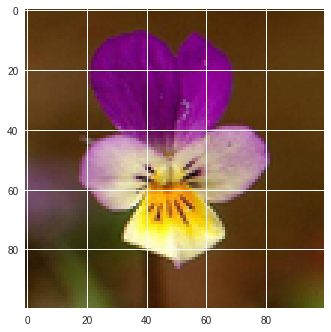

In [7]:
plt.imshow(X[500, ...])

In the line below, plot a histogram of X using an appropriate number of bins.

(array([1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   3.        ,   44.12121212,   85.24242424,  126.36363636,
         167.48484848,  208.60606061,  249.72727273,  290.84848485,
         331.96969697,  373.09090909,  414.21212121,  455.33333333,
         496.45454545,  537.57575758,  578.6969697 ,  619.81818182,
         660.93939394,  702.06060606,  743.18181818,  784.3030303 ,
         825.42424242,  866.54545455,  907.66666667,  948.78787879,
         989.90909091, 1031.03030303, 1072.15151515, 1113.27272727,
        1154.39393939, 1195.51515152, 1236.63636364, 1277.75757576,
        1318.87878788, 1360.        ]),
 <a list of 33 Patch objects>)

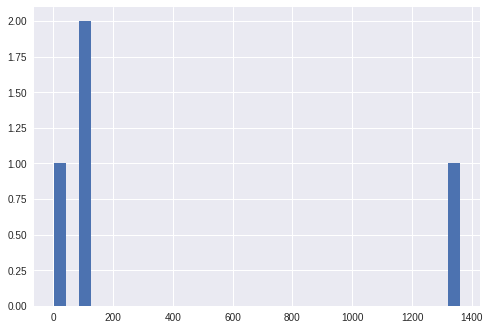

In [61]:
plt.hist(X.shape , bins = 33)

In the line below, normalize the images by subtracting the mean and dividing by the standard deviation of every pixel. 

In [0]:
X_mean = np.mean(X, 0)
X-= X_mean

You will now create a convolutional neural network to predict the flower species from the images. In the line below, create an input layer for the network based on the shape of the images. 

In [0]:
input_layer = tflearn.input_data([None, 100, 100, 3])

In the line below, finish the line and create a convolutional layer to take in the input layer and slide 64 filters with shape 7x7 around it using the relu activation function. You might find the documentation for the conv_2d function helpful: http://tflearn.org/layers/conv/

In [0]:
conv1 = conv_2d(input_layer, 64, 3, activation = 'relu' )

In the line below, I have created a second convolutional layer which will take in the first convolutional layer's feature maps as input. Write a comment to indicate 1) how many filters this layer has, 2) what the filter size is, and 3) what the height and width of each output feature map should be based on the stride.

In [0]:
# comment here = 128 filters
# comment here = size of each filter 3*3 = 9
# comment here = moves over 4 pixels each step so 25*25
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)

In the line below, replace the question marks with appropriate values, keeping in mind this will be the output layer of the network.

In [0]:
output_layer = fully_connected(conv2, 17, activation= 'softmax')

In the line below, remove the question mark and replace it with an appropriate value for the learning rate.

In [0]:
opt = regression(output_layer, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

You don't need to do anything for the line below. 

In [0]:
model = tflearn.DNN(opt)

In the line below, replace each question mark with appropriate values and write a comment next to each line describing what it does (you only need to comment the lines I write *comment here* after.).

In [34]:
model.fit(X, # input images for training
          Y, # desired labels for input images
          validation_set=0.1, # the validation set we will be using which is 10% of our training set
          show_metric=True, 
          n_epoch=10,  # for how many iterations we run the program
          batch_size=75,  # how many images we send for each iteration to the network
          snapshot_step=200)

IndexError: ignored

Download this notebook and upload it to your branch on the class github. 

In [0]:
model.save('ox_flower17')